# Lecture Material Notebook

## Resources:
 * [R Quick Helps](http://www.statmethods.net/)
 * [Body Dimensions](https://www.openintro.org/stat/data/bdims.php)
 
## Topics In Notebook
 * Reducing dimensions through projections
 
<span style="color: #cc1652; font-weight:700"> Video explanation of PCA: </span>https://www.youtube.com/watch?v=FgakZw6K1QQ

In [1]:
# Pull seed data down
# Info about the bdims dataset: https://www.openintro.org/stat/data/bdims.php

download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")

names(bdims)

[1] "bia.di" "bii.di" "bit.di" "che.de" "che.di" "elb.di" "wri.di" "kne.di"
 [9] "ank.di" "sho.gi" "che.gi" "wai.gi" "nav.gi" "hip.gi" "thi.gi" "bic.gi"
[17] "for.gi" "kne.gi" "cal.gi" "ank.gi" "wri.gi" "age"    "wgt"    "hgt"   
[25] "sex"

In [2]:
# Remove 'sex', since it is a factor

!names(bdims) %in% c('sex') # In base R, this returns a logical value for each column, as to whether each column 
                            # is "not in" the 'sex' column.  # the c() function combines the elements of the 
                            # argument to form a vector

lessData <- bdims[,!names(bdims) %in% c('sex')]  # Subset the bdims df to only include those columns that are
                                                # "not in" the 'sex' column.  Name this subset lessData.

head(lessData)

ncol(lessData)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25] FALSE

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,57.5,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5


[1] 24

__Reference__: http://www.sthda.com/english/wiki/principal-component-analysis-in-r-prcomp-vs-princomp-r-software-and-data-mining

In [3]:
cor(lessData)

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,thi.gi,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt
bia.di,1.00000000,0.3090358,0.4862726,0.5832585,0.7691406,0.7658212,0.7228388,0.6359621,0.6614162,0.7925957,⋯,0.12192794,0.6950618,0.7526421,0.5079070,0.5108144,0.6034678,0.7715976,0.08608447,0.7254145,0.74892183
bii.di,0.30903585,1.0000000,0.6734567,0.3567852,0.3311695,0.3228573,0.2792363,0.4377883,0.3683128,0.2772388,⋯,0.41415507,0.2991071,0.2896823,0.4724691,0.4070641,0.3358175,0.2632546,0.24787792,0.4957573,0.38142410
bit.di,0.48627257,0.6734567,1.0000000,0.4725560,0.5241288,0.5257579,0.4681583,0.6083021,0.4954057,0.4787637,⋯,0.53177381,0.4801457,0.4780849,0.6233547,0.5929802,0.5390628,0.4795170,0.27114384,0.6657252,0.48527895
che.de,0.58325846,0.3567852,0.4725560,1.0000000,0.6650702,0.6652377,0.6081147,0.5502889,0.5978540,0.7376115,⋯,0.35765409,0.7328977,0.7175490,0.5636517,0.5535016,0.5873425,0.6802408,0.31540494,0.8007315,0.55291112
che.di,0.76914060,0.3311695,0.5241288,0.6650702,1.0000000,0.7588682,0.7308643,0.6590648,0.6685389,0.8706480,⋯,0.31477348,0.7923345,0.8071175,0.5928721,0.5969089,0.6350210,0.7608931,0.19288765,0.8314645,0.62689315
elb.di,0.76582124,0.3228573,0.5257579,0.6652377,0.7588682,1.0000000,0.8399305,0.7315042,0.8210977,0.8194698,⋯,0.20691659,0.8047840,0.8582063,0.5909794,0.5799083,0.6641619,0.8457563,0.19859008,0.8011938,0.73811293
wri.di,0.72283883,0.2792363,0.4681583,0.6081147,0.7308643,0.8399305,1.0000000,0.7124844,0.7724489,0.7783992,⋯,0.19401995,0.7621594,0.8147088,0.5818739,0.5814377,0.6546945,0.8625527,0.20707962,0.7646054,0.67796162
kne.di,0.63596211,0.4377883,0.6083021,0.5502889,0.6590648,0.7315042,0.7124844,1.0000000,0.7232729,0.6818019,⋯,0.43152755,0.6814055,0.7206519,0.7338176,0.6860935,0.6547070,0.7311803,0.17233593,0.7660485,0.58809509
ank.di,0.66141621,0.3683128,0.4954057,0.5978540,0.6685389,0.8210977,0.7724489,0.7232729,1.0000000,0.6921115,⋯,0.19262774,0.6862886,0.7352504,0.5423538,0.5436159,0.6772298,0.7627486,0.23904361,0.7264682,0.68645053
sho.gi,0.79259572,0.2772388,0.4787637,0.7376115,0.8706480,0.8194698,0.7783992,0.6818019,0.6921115,1.0000000,⋯,0.32342724,0.8951884,0.8949838,0.6247826,0.6270538,0.6797568,0.8407085,0.17683840,0.8788342,0.66573530


In [4]:
# Compute the Principal Components

pca <- princomp(lessData, cor=TRUE)

# The elements of the list (in this case, assigned to the object "pca") returned by the princomp() 
# function include sdev, loadings, center, scale, and scores. 

In [5]:
summary(pca) # print variance accounted for

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     3.8725870 1.5802686 1.13682623 1.03082793 0.83885528
Proportion of Variance 0.6248721 0.1040520 0.05384891 0.04427526 0.02931992
Cumulative Proportion  0.6248721 0.7289241 0.78277303 0.82704829 0.85636821
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.65941506 0.63559068 0.56909734 0.55497082 0.52358565
Proportion of Variance 0.01811784 0.01683231 0.01349466 0.01283303 0.01142258
Cumulative Proportion  0.87448605 0.89131837 0.90481302 0.91764605 0.92906863
                          Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.50904006 0.467690513 0.448696464 0.417610158
Proportion of Variance 0.01079674 0.009113934 0.008388688 0.007266594
Cumulative Proportion  0.93986537 0.948979305 0.957367993 0.964634586
                           Comp.15     Comp.16     Comp.17     Comp.18
Standar

### IMPORTANT PCA information

The __Proportion of Variance__ and __Cumulative Proportion__ help you see how important or significant the components are.  

Note that the first principal component (PC) captures __0.6248721__ of the total variance.
So PC1 accounts for about 62.5% of the total variance.

By looking at the __Cumulative Proportion__, we can see that PC 1 through PC 19 capture 99% of the total variance.

In [6]:
loadings(pca) # pc loadings

# In this matrix of variable loadings, the columns are eigenvectors.


Loadings:
       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
bia.di  0.202  0.231         0.175  0.232         0.434                      
bii.di  0.128 -0.309 -0.142  0.491  0.323        -0.153 -0.656               
bit.di  0.178 -0.266         0.367  0.105 -0.199  0.292  0.303 -0.233 -0.444 
che.de  0.207        -0.207 -0.204  0.137  0.382 -0.204         0.410 -0.429 
che.di  0.222  0.112                0.190 -0.167  0.363        -0.115  0.341 
elb.di  0.224  0.194         0.119        -0.146 -0.190  0.129        -0.139 
wri.di  0.215  0.198               -0.171 -0.191 -0.131                      
kne.di  0.211         0.141  0.209 -0.244 -0.367                0.423  0.261 
ank.di  0.207  0.151         0.239 -0.198        -0.464        -0.248  0.139 
sho.gi  0.233  0.147        -0.182  0.137         0.156                      
che.gi  0.236        -0.111 -0.242  0.151                                    
wai.gi  0.229        -0.212 -0.200  0.119  0.117     

### Scree plot

Next, we will look at the trend of variance captured as we progress from the first PC to the last.
This is typically called a _Scree_ plot.

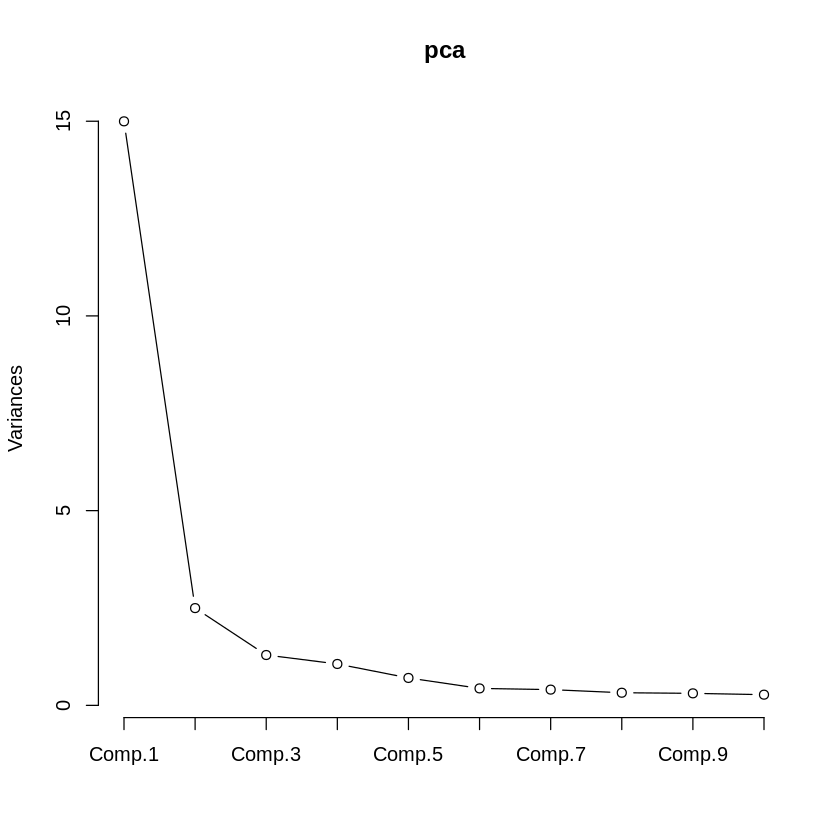

In [7]:
plot(pca,type="lines") # scree plot

We can see that after the first two PC, the contribution to variance is very minimal.

     Comp.1              Comp.2       
 Min.   :-9.022425   Min.   :-6.7696  
 1st Qu.:-3.079190   1st Qu.:-0.8720  
 Median : 0.009518   Median : 0.1259  
 Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 3.044793   3rd Qu.: 1.1194  
 Max.   :11.226310   Max.   : 3.9414  

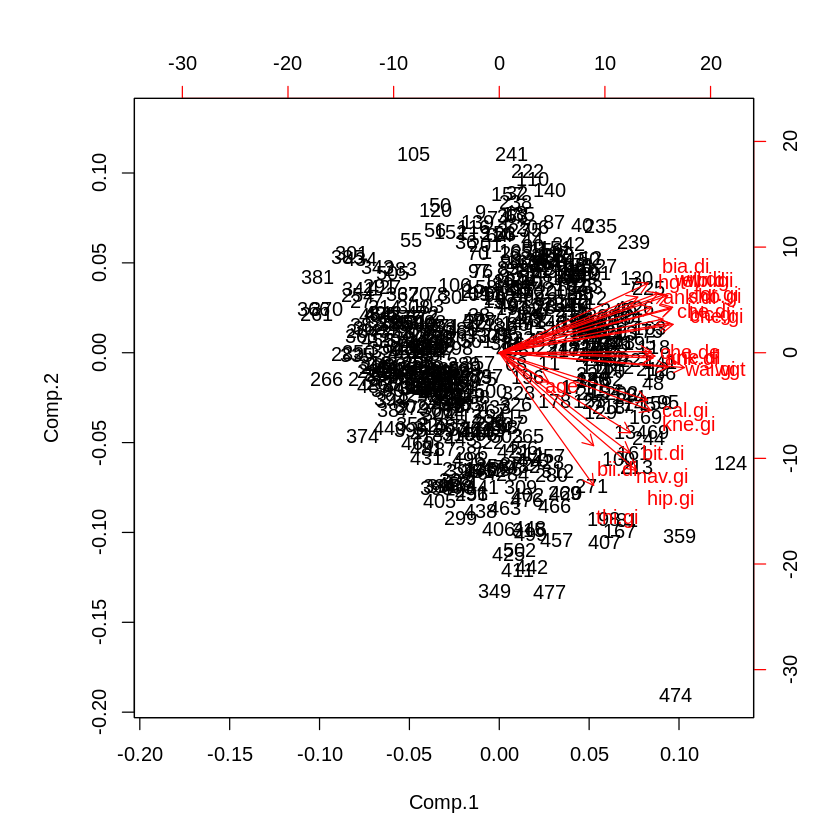

In [8]:
reduced <- pca$scores[,1:2] # the first 2 principal components

# Scores returns the coordinates of the observations on the principal components.

summary(reduced)

biplot(pca) 

# Interpreting a Biplot


Roughly speaking a biplot can be interpreted as follows:
1. an individual that is on the same side of a given variable has a high value for this variable;
2. an individual that is on the opposite side of a given variable has a low value for this variable.
---

From: http://forrest.psych.unc.edu/research/vista-frames/help/lecturenotes/lecture13/biplot.html)

As used in Principal Component Analysis, the axes of a biplot are a pair of principal components. These axes are drawn in black and are labled Comp.1, Comp.2.

A biplot uses **points to represent the scores of the observations** on the _principal components_, and it __uses vectors to represent the coefficients of the variables on the principal components__.

__Interpreting Points__: The relative location of the points can be interpreted. Points that are close together correspond to observations that have similar scores on the components displayed in the plot. To the extent that these components fit the data well, the points also correspond to observations that have similar values on the variables.

The points that are close together are data members with similar projections/position in the transformed space.
That is, their vector components share similar trends in the original data space.


__Interpreting Vectors__: Both the direction and length of the vectors can be interpreted. Vectors point away from the origin in some direction.

A vector points in the direction which is most like the variable represented by the vector. This is the direction which has the highest squared multiple correlation with the principal components. The length of the vector is proportional to the squared multiple correlation between the fitted values for the variable and the variable itself.

The fitted values for a variable are the result of projecting the points in the space orthogonally onto the variable's vector (to do this, you must imagine extending the vector in both directions). The observations whose points project furthest in the direction in which the vector points are the observations that have the most of whatever the variable measures. Those points that project at the other end have the least. Those projecting in the middle have an average amount. 

Thus, vectors that point in the same direction correspond to variables that have similar response profiles, and can be interpreted as having similar meaning in the context set by the data. 

---



## Factor Analysis

Finding underlying driving variables that lead to the observed variable.

In [9]:
# Maximum Likelihood Factor Analysis
# entering raw data and extracting 3 factors, with varimax rotation

students <- read.csv("/dsa/data/all_datasets/student_prefs/student_subject_preferences.csv")
summary(students)
cor(students)

      BIO             GEO            CHEM            ALG            CALC      
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:2.00   1st Qu.:2.000  
 Median :2.000   Median :2.00   Median :2.000   Median :3.00   Median :3.000  
 Mean   :2.353   Mean   :2.17   Mean   :2.237   Mean   :3.05   Mean   :3.063  
 3rd Qu.:3.000   3rd Qu.:3.00   3rd Qu.:3.000   3rd Qu.:4.00   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.00   Max.   :5.000   Max.   :5.00   Max.   :5.000  
      STAT      
 Min.   :1.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :2.937  
 3rd Qu.:4.000  
 Max.   :5.000  

,BIO,GEO,CHEM,ALG,CALC,STAT
BIO,1.0000000,0.6822208,0.7470278,0.1153204,0.2134271,0.2028315
GEO,0.6822208,1.0000000,0.6814857,0.1353557,0.2045215,0.2316288
CHEM,0.7470278,0.6814857,1.0000000,0.0838225,0.1364251,0.1659747
ALG,0.1153204,0.1353557,0.0838225,1.0000000,0.7709303,0.4094324
CALC,0.2134271,0.2045215,0.1364251,0.7709303,1.0000000,0.5073147
STAT,0.2028315,0.2316288,0.1659747,0.4094324,0.5073147,1.0000000


In [10]:
efa <- factanal(students, 2, rotation="varimax")

print(efa, digits=2, cutoff=0.3, sort=TRUE)


Call:
factanal(x = students, factors = 2, rotation = "varimax")

Uniquenesses:
 BIO  GEO CHEM  ALG CALC STAT 
0.25 0.37 0.25 0.37 0.05 0.71 

Loadings:
     Factor1 Factor2
BIO  0.85           
GEO  0.78           
CHEM 0.86           
ALG          0.79   
CALC         0.97   
STAT         0.51   

               Factor1 Factor2
SS loadings       2.12    1.86
Proportion Var    0.35    0.31
Cumulative Var    0.35    0.66

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 2.94 on 4 degrees of freedom.
The p-value is 0.568 


### Factor Analysis Interpretation

The way to interpret factors is to look at the observed variables that each factor contribute to:

__Factor 1__ : contributes to Biology, Geography, and Chemistry  
__Factor 2__ : contributed to Algebra, Calculus, and Statistics  

Can we assign a conceptual label to the factors, based on the measurement variables they are contributing to?

Yes!  We can associate the first factor with _Science_ and the second factor with _Math_.  If these were scores on standardized tests, we could use the factor analysis to plot students into sets of ''Science Kids'' and ''Math Kids''.

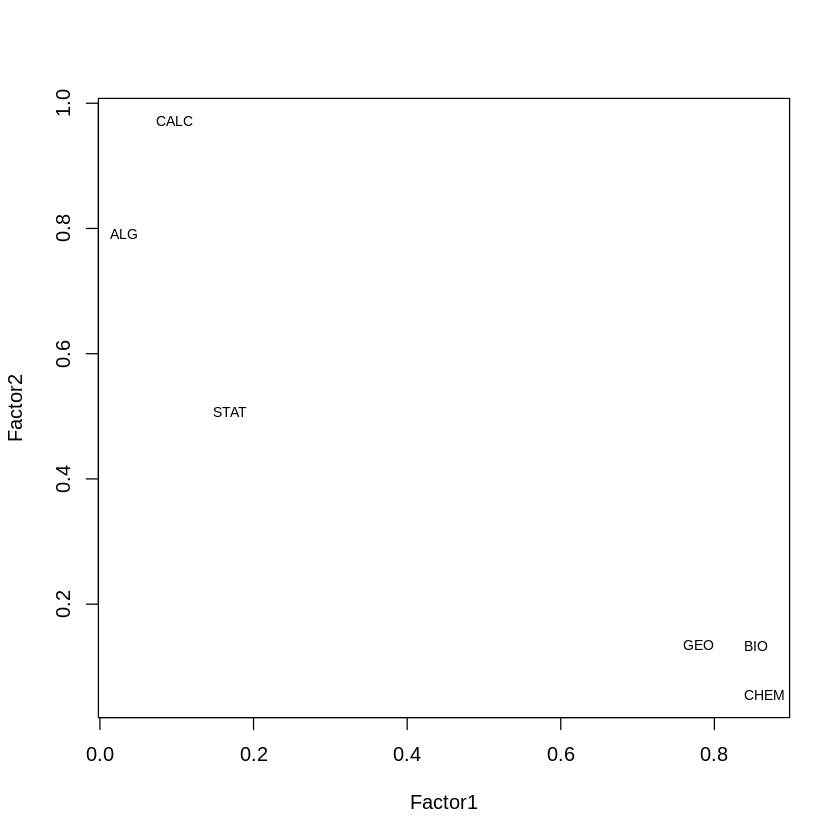

In [11]:
# plot factor 1 by factor 2
load <- efa$loadings[,1:2]
plot(load,type="n") # set up plot
text(load,labels=names(students),cex=.7) # add variable names 

A noticeable result of plotting the original variables in the factor space is that they separate in the scatter plot of the factor axis.